In [1]:
import tomllib
from itertools import islice

import ehc_sn as ehc
import matplotlib.pyplot as plt
import torch

import plots

In [2]:
with open("configurations/balanced_network.toml", "rb") as f:
    data = tomllib.load(f)

In [3]:
parameters = ehc.Parameters.model_validate(data)
model = ehc.Network(p=parameters)
model = torch.compile(model)
model.eval()

OptimizedModule(
  (_orig_mod): Network(
    (excitatory): EILayer(
      (neurons): BaseLayer(p=LIFRefracParameters(lif=LIFParameters(tau_syn_inv=tensor(0.2000, device='cuda:0'), tau_mem_inv=tensor(0.5000, device='cuda:0'), v_leak=tensor(-45., device='cuda:0'), v_th=tensor(-50., device='cuda:0'), v_reset=tensor(-60., device='cuda:0'), method='super', alpha=tensor(0.5000, device='cuda:0')), rho_reset=tensor(5, device='cuda:0')), dt=0.001)
      (ampa): Inputs()
      (gaba): Inputs()
    )
    (inhibitory): EILayer(
      (neurons): BaseLayer(p=LIFRefracParameters(lif=LIFParameters(tau_syn_inv=tensor(0.1000, device='cuda:0'), tau_mem_inv=tensor(0.5000, device='cuda:0'), v_leak=tensor(-50., device='cuda:0'), v_th=tensor(-50., device='cuda:0'), v_reset=tensor(-60., device='cuda:0'), method='super', alpha=tensor(0.5000, device='cuda:0')), rho_reset=tensor(5, device='cuda:0')), dt=0.001)
      (ampa): Inputs()
      (gaba): Inputs()
    )
  )
)

In [4]:
decoder = ehc.decoders.HannDecoder(window_length=1000)
current = 0.4  # Input current
xmin, xmax = 0, 20  # Neurons with added current
ymin, ymax = 0, 20

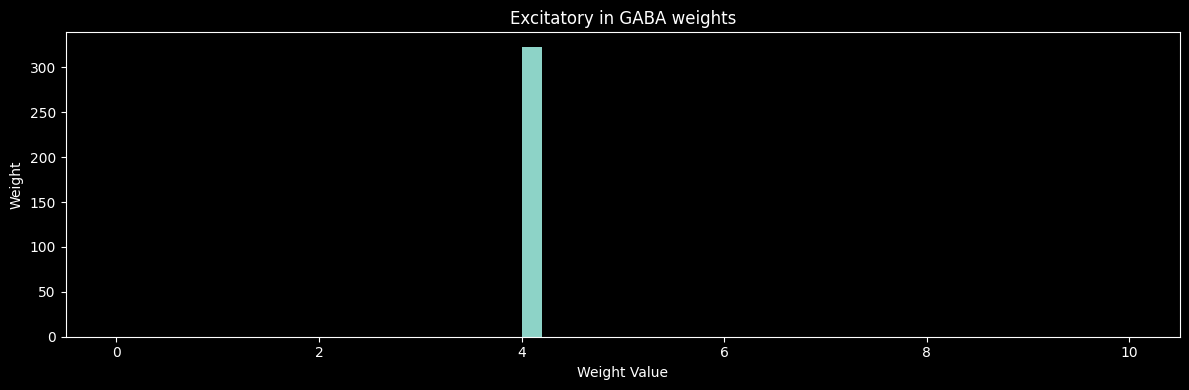

In [5]:
w = model.excitatory.gaba.w.detach().cpu()
mask = model.excitatory.gaba.mask.detach().cpu()
filtered_weights = w.masked_select(mask)
plots.weights(filtered_weights, "Excitatory in GABA weights")
plt.show()

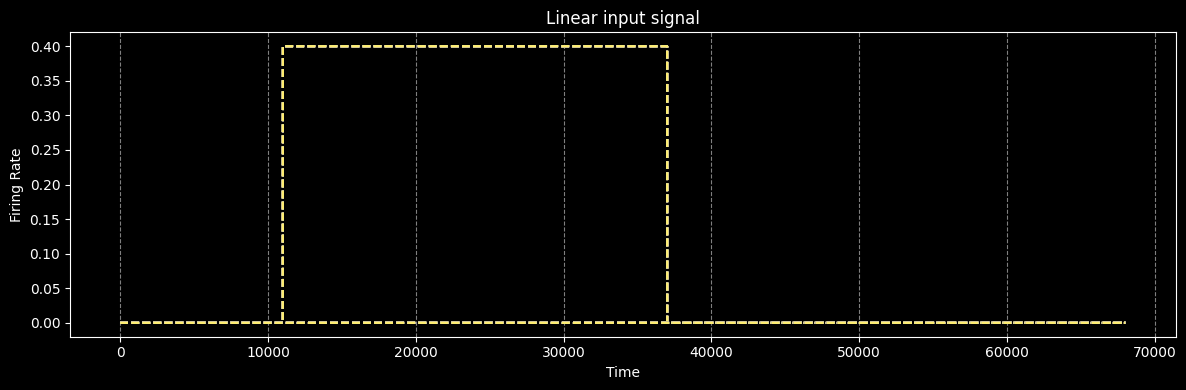

In [6]:
signal_in = torch.zeros(68000, 80).to(ehc.device)
signal_in[11000:37000, xmin:xmax] = current
signal_loader = iter(signal_in)
plots.signal(signal_in.cpu(), "Linear input signal")
plt.show()

In [7]:
_ = torch.stack([model(x) for x in islice(signal_loader, 10000)])  # 0-10000

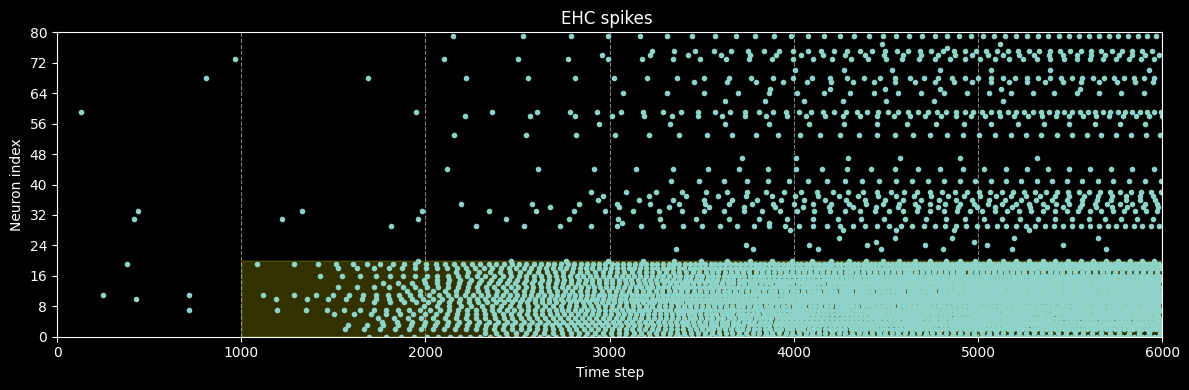

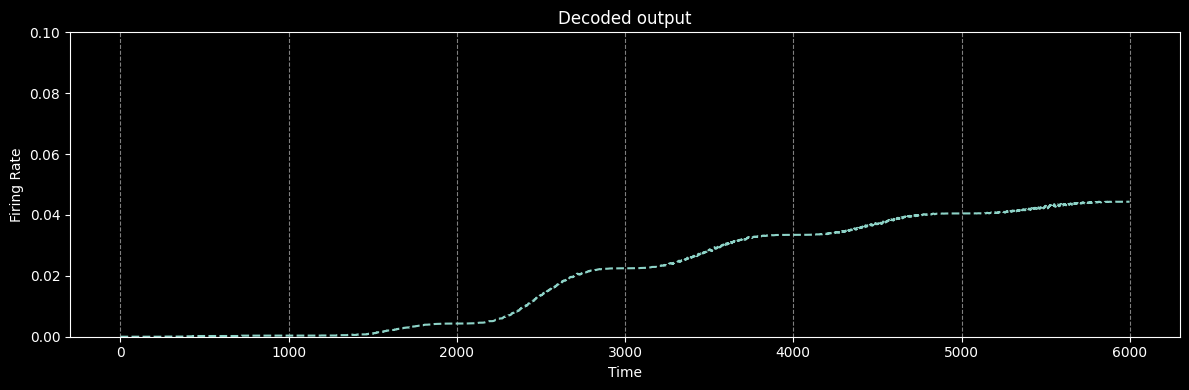

In [8]:
spikes_out = torch.stack([model(x) for x in islice(signal_loader, 6000)])  # 10000-16000
plots.raster(spikes_out.cpu(), "EHC spikes ")
x = range(1000, spikes_out.shape[0])  # x-range starting from 1000
plt.fill_between(x, ymin, ymax, color="yellow", alpha=0.2, label="Highlighted Band")
plt.ylim(0, spikes_out.shape[1])
plt.show()

signal_out = torch.stack([decoder(x) for x in spikes_out[:, ymin:ymax]])
signal_out = signal_out.mean(dim=1).unsqueeze(1).detach()
plots.signal(signal_out.cpu(), "Decoded output")
plt.ylim(0, 0.1)
plt.show()

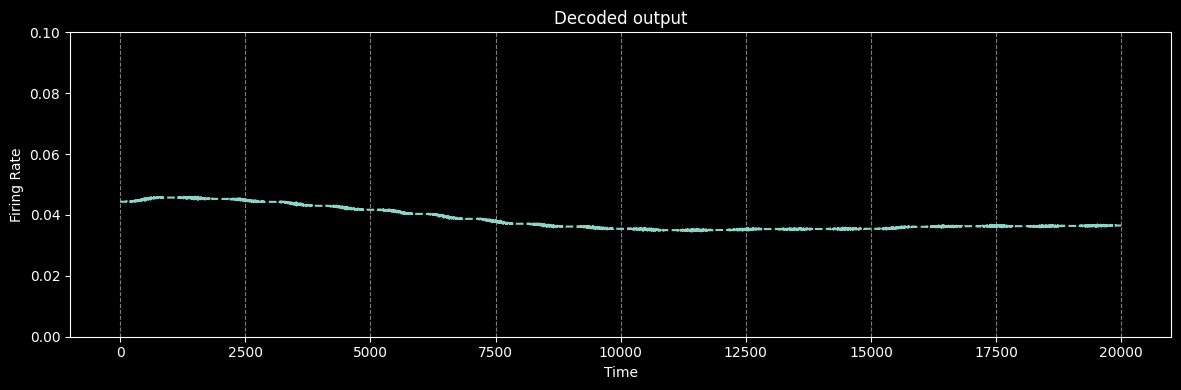

In [9]:
spikes_out = torch.stack([model(x) for x in islice(signal_loader, 20000)])  # 16000-36000
signal_out = torch.stack([decoder(x) for x in spikes_out[:, ymin:ymax]])
signal_out = signal_out.mean(dim=1).unsqueeze(1).detach()
plots.signal(signal_out.cpu(), "Decoded output")
plt.ylim(0, 0.1)
plt.show()

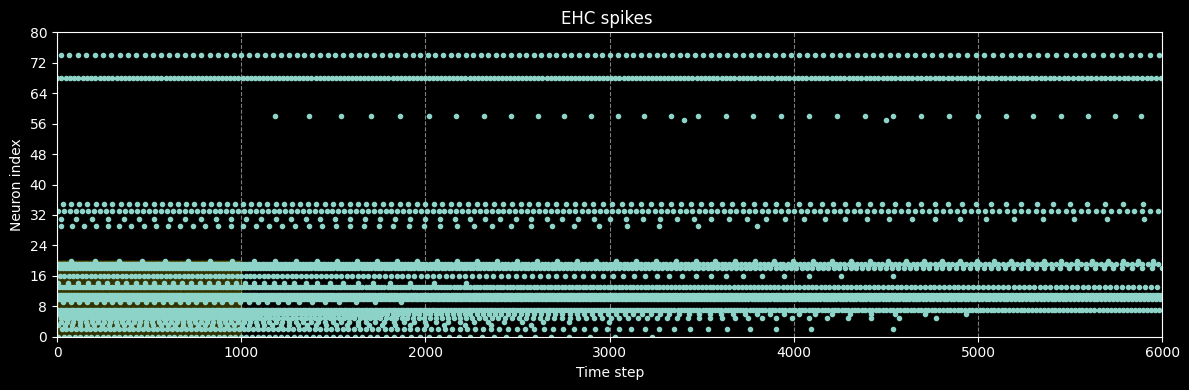

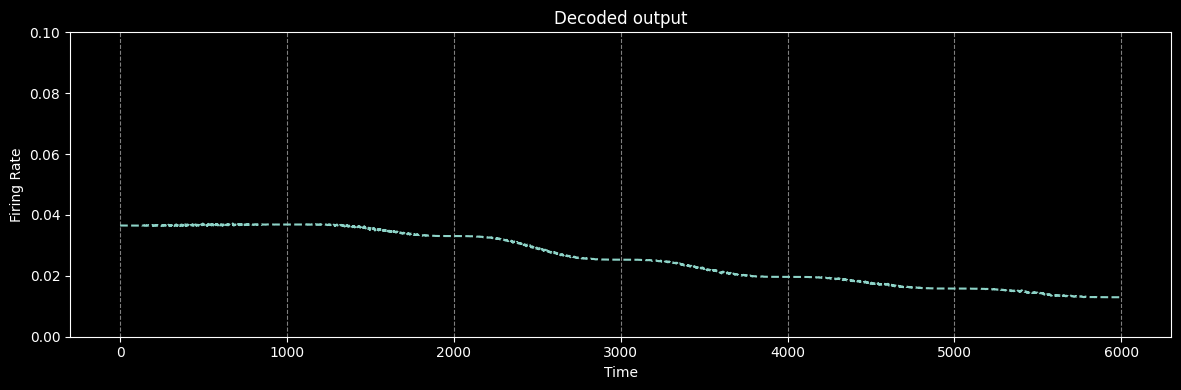

In [10]:
spikes_out = torch.stack([model(x) for x in islice(signal_loader, 6000)])  # 36000-42000
plots.raster(spikes_out.cpu(), "EHC spikes ")
x = range(0, 1000)  # x-range ending at 1000
plt.fill_between(x, ymin, ymax, color="yellow", alpha=0.2, label="Highlighted Band")
plt.ylim(0, spikes_out.shape[1])
plt.show()

signal_out = torch.stack([decoder(x) for x in spikes_out[:, ymin:ymax]])
signal_out = signal_out.mean(dim=1).unsqueeze(1).detach()
plots.signal(signal_out.cpu(), "Decoded output")
plt.ylim(0, 0.1)
plt.show()

In [11]:
_ = torch.stack([model(x) for x in islice(signal_loader, 20000)])  # 42000-62000

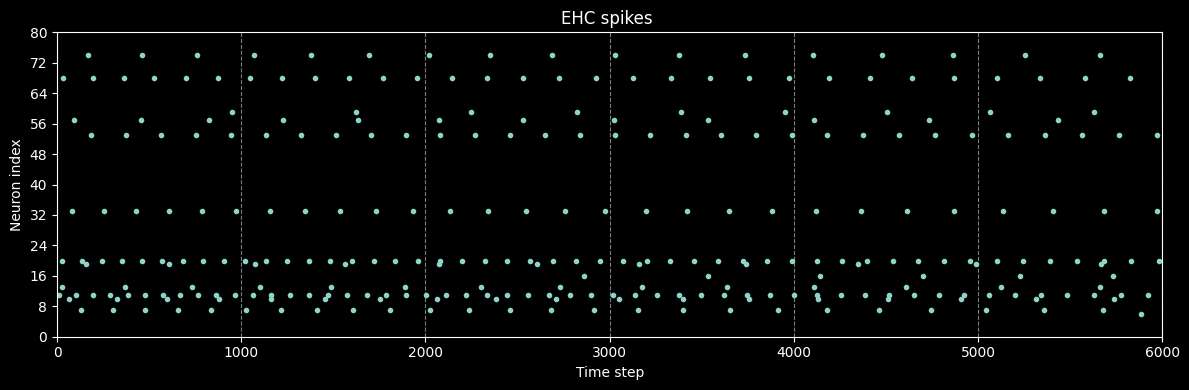

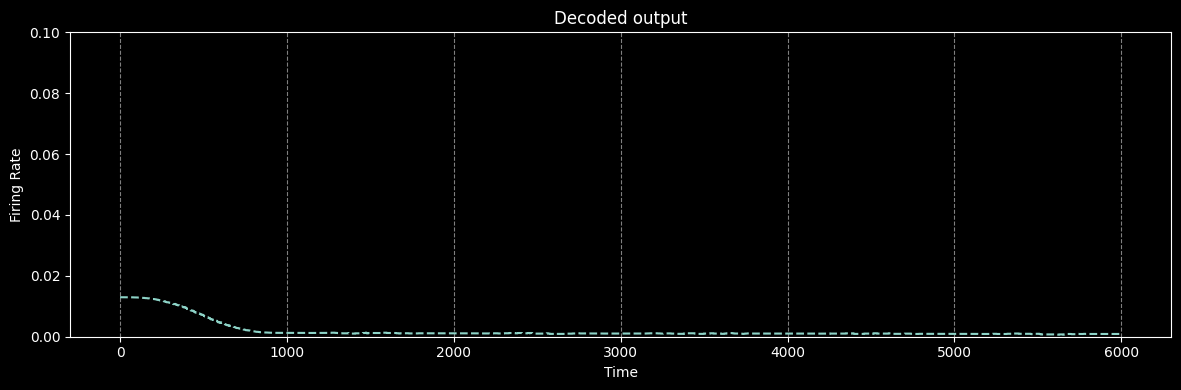

In [12]:
spikes_out = torch.stack([model(x) for x in islice(signal_loader, 6000)])  # 62000-68000
plots.raster(spikes_out.cpu(), "EHC spikes ")
plt.ylim(0, spikes_out.shape[1])
plt.show()

signal_out = torch.stack([decoder(x) for x in spikes_out[:, ymin:ymax]])
signal_out = signal_out.mean(dim=1).unsqueeze(1).detach()
plots.signal(signal_out.cpu(), "Decoded output")
plt.ylim(0, 0.1)
plt.show()

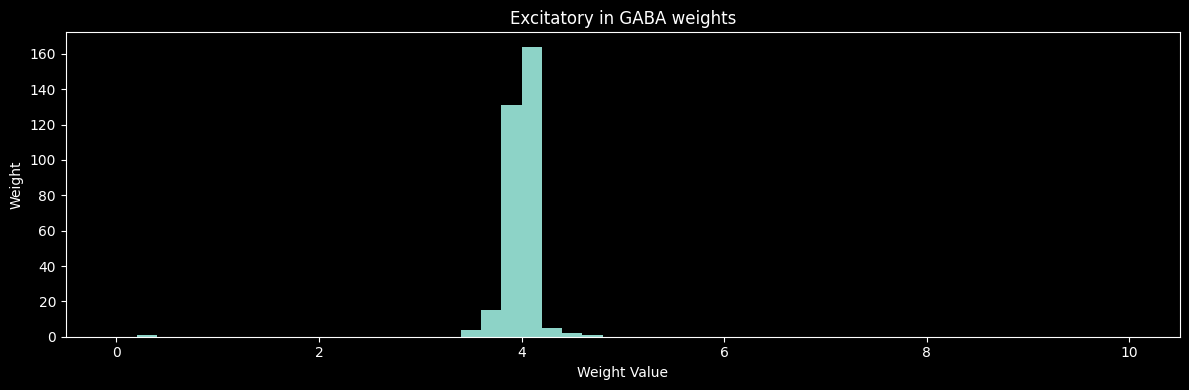

In [13]:
w = model.excitatory.gaba.w.detach().cpu()
mask = model.excitatory.gaba.mask.detach().cpu()
filtered_weights = w.masked_select(mask)
plots.weights(filtered_weights, "Excitatory in GABA weights")
plt.show()